    accuracy  misclassrate  sensitivity  specificity  oneminusspec  distance  \
27  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
28  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
29  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
30  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
31  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
32  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   
33  0.682081      0.317919     0.692308     0.674877      0.325123  0.447638   

    cut-off  
27     0.28  
28     0.29  
29     0.30  
30     0.31  
31     0.32  
32     0.33  
33     0.34  
0.7814776561697745


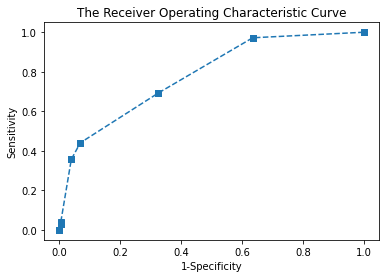

In [11]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

pneumonia_data=pandas.read_csv('C:/Users/000110888/Desktop/pneumonia_data.csv')
code_gender={'M':1,'F':0}
code_tobacco_use={'yes':1,'no':0}
code_pneumonia={'yes':1,'no':0}

pneumonia_data['gender']=pneumonia_data['gender'].map(code_gender)
pneumonia_data['tobacco_use']=pneumonia_data['tobacco_use'].map(code_tobacco_use)
pneumonia_data['pneumonia']=pneumonia_data['pneumonia'].map(code_pneumonia)

X=pneumonia_data.iloc[:,0:4].values
y=pneumonia_data.iloc[:,4].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=786756)

#FITTING BINARY TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#COMPUTING CONFUSION MATRICES AND PERFORMANCE MEASURES FOR TESTING SET FOR A RANGE OF CUTOFFS
y_pred=gini_tree.predict_proba(X_test)

total=len(y_pred)

cutoff=[]
accuracy=[]
misclassrate=[]
sensitivity=[]
specificity=[]
oneminusspec=[]
distance=[]

for i in range(99):
    tp=0
    fp=0
    tn=0
    fn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        fp_ind=1 if (sub1>0.01*(i+1) and sub2==0) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        fn_ind=1 if (sub1<0.01*(i+1) and sub2==1) else 0
        tp+=tp_ind
        fp+=fp_ind
        tn+=tn_ind
        fn+=fn_ind
        
    accuracy_i=(tp+tn)/total
    misclassrate_i=(fp+fn)/total
    sensitivity_i=tp/(tp+fn)
    specificity_i=tn/(fp+tn)
    oneminusspec_i=fp/(fp+tn) 
    distance_i=numpy.sqrt(pow(oneminusspec_i,2)+pow(1-sensitivity_i,2))
    
    accuracy.append(accuracy_i)
    misclassrate.append(misclassrate_i)
    sensitivity.append(sensitivity_i)
    specificity.append(specificity_i)
    oneminusspec.append(oneminusspec_i)
    distance.append(distance_i)
    
#PLOTTING ROC CURVE
import matplotlib.pyplot as plot
plt.plot(oneminusspec, sensitivity, linestyle='--', marker='s')
plt.title('The Receiver Operating Characteristic Curve')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')

#REPORTING MEASURES FOR THE POINT ON ROC CURVE CLOSEST TO THE IDEAL POINT (0,1)
df=pandas.DataFrame({'accuracy': accuracy,'misclassrate': misclassrate,'sensitivity':
sensitivity,'specificity': specificity, 'oneminusspec': oneminusspec,'distance': distance,'cut-off': cutoff})
min_distance=min(distance)
optimal=df[df['distance']==min_distance]
print(optimal)
Z
#COMPUTING AREA UNDER THE ROC CURVE
df=df.sort_values('oneminusspec', ascending=True) 
df['lagx']=df['oneminusspec'].shift(1)
df['lagy']=df['sensitivity'].shift(1)
df['lagx']=numpy.nan_to_num(df['lagx'],nan=0)
df['lagy']=numpy.nan_to_num(df['lagy'],nan=0)
df['trapezoid']=(df['oneminusspec']-df['lagx'])*(df['sensitivity']+df['lagy'])/2;
AUC=sum(df['trapezoid'])
print(AUC)
